# Task 1: Prediction using Unsupervised ML
## Author: Raunak Thapliyal
### From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

%matplotlib inline

# Read the Iris dataset 

In [7]:
df=pd.read_csv("Iris.csv")

In [9]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
df.shape

(150, 6)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### How many Flowers for each Species ?

In [15]:
df["Species"].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

### 2-d Scatter plot with color-coding for each flower type

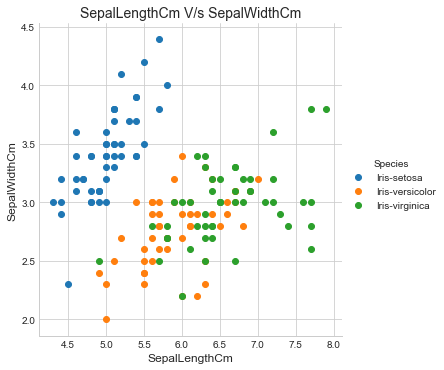

In [21]:
x = df.iloc[:, [1,2,3,4]].values
sns.set_style("whitegrid")
sns.FacetGrid(df,hue="Species",size=5).map(plt.scatter,"SepalLengthCm","SepalWidthCm").add_legend()
plt.xlabel('SepalLengthCm', fontsize=12)
plt.ylabel('SepalWidthCm' , fontsize=12)
plt.title("SepalLengthCm V/s SepalWidthCm", fontsize=14)
plt.show()


# Finding the optimal number of clusters by using the Elbow Method

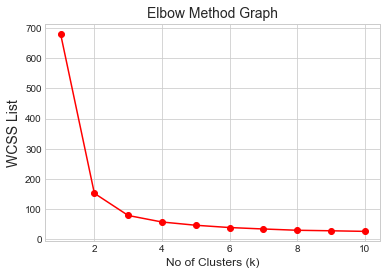

In [22]:
wcss_list= []  #Initializing the list for the value of wcss computed for different values of k ranging from 1 to 10

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    wcss_list.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss_list, c="red", marker= "o")
plt.title('Elbow Method Graph', fontsize=14)
plt.xlabel('No of Clusters (k)', fontsize=12)
plt.ylabel('WCSS List' , fontsize=14)
plt.show()

## As we can see, Elbow point is at k=3

# Applying K-means algorithm 

In [23]:
kmeans = KMeans(n_clusters=3)
y_predict= kmeans.fit_predict(x)
kmeans.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

# Visualizing Cluster

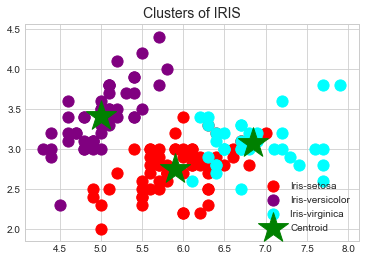

In [28]:
plt.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 500, marker=".", c = 'red', label = 'Iris-setosa') #for first cluster  
plt.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 500, marker=".", c = 'purple', label = 'Iris-versicolor') #for second cluster  
plt.scatter(x[y_predict== 2, 0], x[y_predict == 2, 1], s = 500, marker=".", c = 'cyan', label = 'Iris-virginica ') #for third cluster  
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 1000, marker="*", c = 'green', label = 'Centroid')
plt.title('Clusters of IRIS', fontsize=14)  
 
plt.legend()  
plt.show()